In [36]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [388]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [335]:
print(test.columns)

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')


In [336]:
print(train.columns)

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')


In [337]:
train['ID'].describe()

count    330045.000000
mean     235748.682789
std      136039.418471
min           1.000000
25%      117909.000000
50%      235699.000000
75%      353620.000000
max      471493.000000
Name: ID, dtype: float64

In [338]:
train['ID'].unique()

array([ 52664, 327662, 468453, ..., 210756,  56089, 300553])

In [320]:
train['Tag'].describe()

count     330045
unique        10
top            c
freq       72458
Name: Tag, dtype: object

In [321]:
train['ID'].unique()

array([ 52664, 327662, 468453, ..., 210756,  56089, 300553])

In [322]:
train['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [323]:
print(train.columns)

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')


In [324]:
train['Reputation'].describe()

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

In [325]:
train['Answers'].describe()

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64

In [326]:
train['Answers'].unique()

array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55.])

In [327]:
train['Username'].describe()

count    330045.000000
mean      81442.888803
std       49215.100730
min           0.000000
25%       39808.000000
50%       79010.000000
75%      122559.000000
max      175738.000000
Name: Username, dtype: float64

In [328]:
train['Views'].describe()

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64

In [329]:
train['Views'].unique()

array([ 7855., 55801.,  8067., ..., 85644., 52493., 23319.])

In [330]:
train['Upvotes'].describe()

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64

In [331]:
a=[]
for i in train['Tag']:
    if i == 'a':
        a.append(int(1))
    elif i == 'c':
        a.append(int(2))
    elif i == 'i':
        a.append(int(3))
    elif i == 'j':
        a.append(int(4))
    elif i == 'o':
        a.append(int(5))
    elif i == 'p':
        a.append(int(6))
    elif i == 'h':
        a.append(int(7))
    elif i == 'r':
        a.append(int(8))
    elif i == 's':
        a.append(int(9))
    else:
        a.append(int(10))

In [332]:
a=[]
for i in test['Tag']:
    if i == 'a':
        a.append(int(1))
    elif i == 'c':
        a.append(int(2))
    elif i == 'i':
        a.append(int(3))
    elif i == 'j':
        a.append(int(4))
    elif i == 'o':
        a.append(int(5))
    elif i == 'p':
        a.append(int(6))
    elif i == 'h':
        a.append(int(7))
    elif i == 'r':
        a.append(int(8))
    elif i == 's':
        a.append(int(9))
    else:
        a.append(int(10))

In [256]:
test['Tag']=a

In [339]:
train.shape

(330045, 7)

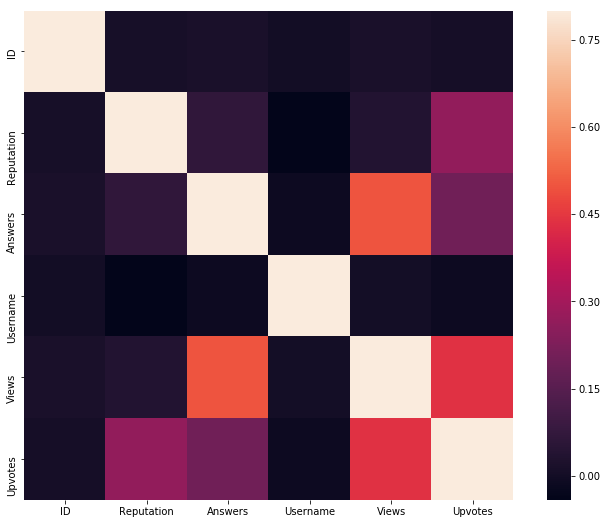

In [340]:
corrmat=train.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [341]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [389]:
x_min=min(train['Reputation'])
x_max=max(train['Reputation'])
train['Reputation']=(train['Reputation']-x_min)/np.average(train['Reputation'])

In [390]:
x_min=min(test['Reputation'])
x_max=max(test['Reputation'])
test['Reputation']=(test['Reputation']-x_min)/np.average(test['Reputation'])

In [391]:
x_min=min(train['Views'])
x_max=max(train['Views'])
train['Views']=(train['Views']-x_min)/np.average(train['Views'])

In [392]:
x_min=min(test['Views'])
x_max=max(test['Views'])
test['Views']=(test['Views']-x_min)/np.average(test['Views'])

In [393]:
x_min=min(train['Answers'])
x_max=max(train['Answers'])
train['Answers']=(train['Answers']-x_min)/np.average(train['Answers'])

In [394]:
x_min=min(test['Answers'])
x_max=max(test['Answers'])
test['Answers']=(test['Answers']-x_min)/np.average(test['Answers'])

In [428]:
train['Reputation']=np.multiply(train['Reputation'],max(train['Upvotes'])-min(train['Upvotes']))

In [429]:
train['Views']=np.multiply(train['Views'],max(train['Upvotes'])-min(train['Upvotes']))
train['Answers']=np.multiply(train['Answers'],max(train['Upvotes'])-min(train['Upvotes']))
train['Upvotes']=np.multiply(train['Upvotes'],max(train['Upvotes'])-min(train['Upvotes']))

In [430]:
test['Reputation']=np.multiply(test['Reputation'],max(train['Upvotes'])-min(train['Upvotes']))
test['Views']=np.multiply(test['Views'],max(train['Upvotes'])-min(train['Upvotes']))
test['Answers']=np.multiply(test['Answers'],max(train['Upvotes'])-min(train['Upvotes']))


In [431]:
col=['Reputation','Answers','Views']

In [432]:
train[col].head()

,Reputation,Answers,Views
0,3.986709e+19,2.469268e+25,1.280153e+25
1,2.634141e+20,1.481561e+26,9.103023e+25
2,1.373402e+19,4.938535e+25,1.314743e+25
3,2.669942e+18,3.703901e+25,4.414294e+25
4,4.319441e+19,4.938535e+25,2.280487e+25


In [433]:
train['Upvotes']

0         9.782806e+18
1         2.736856e+20
2         1.397544e+19
3         2.096316e+18
4         1.933269e+19
5         9.316958e+17
6         3.959707e+18
7         6.987719e+17
8         1.840099e+19
9         0.000000e+00
10        3.866538e+19
11        9.782806e+18
12        4.425555e+18
13        4.658479e+17
14        2.329240e+18
15        5.194204e+19
16        3.028011e+18
17        1.863392e+18
18        2.096316e+18
19        1.840099e+19
20        1.444129e+19
21        0.000000e+00
22        2.329240e+18
23        1.118035e+19
24        1.490713e+19
25        9.316958e+17
26        1.327667e+19
27        1.164620e+18
28        1.094743e+19
29        1.164620e+18
              ...     
330015    2.142900e+19
330016    6.987719e+17
330017    6.056023e+18
330018    3.260935e+19
330019    2.189485e+19
330020    2.329240e+17
330021    9.316958e+17
330022    1.490713e+19
330023    2.329240e+18
330024    6.987719e+17
330025    9.316958e+17
330026    4.425555e+18
330027    1

In [419]:
test[col].head()

,Reputation,Answers,Views
0,1.479926e+08,1.591313e+08,2.309306e+08
1,6.425946e+08,3.182626e+08,1.893170e+07
2,2.430277e+07,5.304377e+07,1.472094e+08
3,5.505482e+05,3.182626e+08,1.288483e+08
4,1.173192e+08,5.304377e+08,3.981919e+08


In [434]:
from sklearn.model_selection import train_test_split
#training set
train_set=train.sample(frac=0.7,random_state=1)
#test set
test_set=train.loc[~train.index.isin(train_set.index)]
print(train_set.shape)
print(test_set.shape)

(231031, 7)
(99014, 7)


In [435]:
train_set[col].head()
test_set[col].head()

,Reputation,Answers,Views
0,3.986709e+19,2.469268e+25,1.280153e+25
5,4.449904e+18,1.234634e+25,9.084749e+24
7,2.294735e+19,2.469268e+25,4.943748e+23
23,1.021455e+18,9.877070e+25,9.069249e+25
25,3.701511e+18,1.234634e+25,1.002292e+25


In [436]:
target="Upvotes"

In [437]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_set[col],train_set[target])
predictions = forest_model.predict(test_set[col])

In [438]:
new_list = []
for item in predictions:
    new_list.append(int(round(item)))

In [441]:
new_list=np.divide(new_list,max(train['Upvotes']-min(train['Upvotes'])))

In [442]:
from sklearn.metrics import mean_squared_error

In [443]:
mean_squared_error(new_list,test_set[target])

5.504790718894091e+41

In [444]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3.986709e+19,2.469268e+25,155623,1.280153e+25,9.782806e+18
1,327662,a,2.634141e+20,1.481561e+26,21781,9.103023e+25,2.736856e+20
2,468453,c,1.373402e+19,4.938535e+25,56177,1.314743e+25,1.397544e+19
3,96996,a,2.669942e+18,3.703901e+25,168793,4.414294e+25,2.096316e+18
4,131465,c,4.319441e+19,4.938535e+25,112223,2.280487e+25,1.933269e+19


In [384]:
forest_model = RandomForestRegressor()
forest_model.fit(train[col],train[target])
#predictions = forest_model.predict(test_set[col])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [385]:
prediction = forest_model.predict(test[col])

In [386]:
nlist = []
for item in prediction:
    nlist.append(int(round(item)))

In [387]:
my_submission = pd.DataFrame({'ID': test.ID, 'Upvotes': nlist})

my_submission.to_csv('submission.csv', index=False)